# Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carga de los datos

In [2]:
df = pd.read_csv("padel.csv")

print("Shape:", df.shape)
df.head()

C:\Users\kenny\AppData\Local\Temp\ipykernel_18436\2566041355.py:1: DtypeWarning: Columns (6,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("padel.csv")


Shape: (540300, 30)


,frame_idx,duration,total_frames,video_duration,player_id,player_name,team,zone,ball_position_x,ball_position_y,...,player_speed_mps,prev_speed,player_acceleration_mps2,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,time_since_last_hit,partido,punto
0,0,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
1,1,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
2,2,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
3,3,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0
4,4,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,top,right_box,3.24,17.111111,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Partido 27,10.0


# Revisión del dataset

In [3]:
print("\n===== ESTADÍSTICAS DESCRIPTIVAS =====")
display(df.describe(include='all'))

print("\n===== PORCENTAJE DE NULOS POR COLUMNA =====")
null_percent = (df.isnull().mean() * 100).round(2)
display(null_percent)


===== ESTADÍSTICAS DESCRIPTIVAS =====


,frame_idx,duration,total_frames,video_duration,player_id,player_name,team,zone,ball_position_x,ball_position_y,...,player_speed_mps,prev_speed,player_acceleration_mps2,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,time_since_last_hit,partido,punto
count,540300.000000,540300.000000,540300.000000,540300.000000,540300.000000,519424,159382,540300,540300.000000,540300.000000,...,537585.000000,535092.000000,535092.000000,430743.000000,430743.000000,430743.0,430743.0,16361.000000,540300.0,519424.000000
unique,NaN,NaN,NaN,NaN,NaN,331,2,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN
top,NaN,NaN,NaN,NaN,NaN,María José Cifuentes,bottom,left_box,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,18532,81394,224013,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36172.0,NaN
mean,236.541947,0.024876,471.026461,11.333344,14.085208,NaN,NaN,NaN,4.239575,10.316255,...,1.585811,1.580268,-0.205568,4.208803,10.380320,0.0,0.0,2.877869,NaN,5.763627
std,208.280158,0.008320,273.626478,7.086376,44.588668,NaN,NaN,NaN,2.549286,4.537078,...,12.787924,12.776415,892.103624,2.576104,4.556784,0.0,0.0,3.367727,NaN,3.276996
min,0.000000,0.016667,72.000000,1.200000,1.000000,NaN,NaN,NaN,0.560000,0.311111,...,0.000000,0.000000,-44598.638900,0.560000,0.311111,0.0,0.0,0.000000,NaN,1.000000
25%,88.000000,0.016667,278.000000,6.566667,2.000000,NaN,NaN,NaN,2.200000,6.488889,...,0.000000,0.000000,0.000000,2.160000,6.488889,0.0,0.0,0.616667,NaN,3.000000
50%,181.000000,0.016773,420.000000,9.150000,3.000000,NaN,NaN,NaN,3.520000,10.622222,...,0.000000,0.000000,0.000000,3.520000,10.755556,0.0,0.0,1.766667,NaN,6.000000
75%,325.000000,0.033333,597.000000,14.833333,7.000000,NaN,NaN,NaN,6.200000,13.866667,...,1.697056,1.697056,0.000000,6.160000,13.955556,0.0,0.0,3.950000,NaN,9.000000



===== PORCENTAJE DE NULOS POR COLUMNA =====


frame_idx                         0.00
duration                          0.00
total_frames                      0.00
video_duration                    0.00
player_id                         0.00
player_name                       3.86
team                             70.50
zone                              0.00
ball_position_x                   0.00
ball_position_y                   0.00
player_position_x                 0.00
player_position_y                 0.00
distance_ball_to_net              0.00
distance_player_to_ball_m         0.00
distance_player_to_net_m          0.00
distance_player_to_teammate_m    52.29
player_hits_ball                  0.00
prev_x                            0.50
prev_y                            0.50
player_displacement               0.50
player_speed_mps                  0.50
prev_speed                        0.96
player_acceleration_mps2          0.96
ball_position_x_prev             20.28
ball_position_y_prev             20.28
ball_displacement        

# Limpieza

In [4]:
df_clean = df.copy()

cols_to_drop = [
    "team",                           # 70% nulos
    "distance_player_to_teammate_m",  # 52%
    "time_since_last_hit"             # 97%
]

df_clean = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns])
print("Columnas eliminadas:", [c for c in cols_to_drop if c in df_clean.columns])

ball_prev_cols = ["ball_position_x_prev", "ball_position_y_prev"]
ball_motion_cols = ["ball_displacement", "ball_speed_mps"]

for col in ball_prev_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(method="ffill")

for col in ball_motion_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(0)

small_nulls_mean = [
    "player_displacement",
    "player_speed_mps",
    "prev_speed",
    "player_acceleration_mps2"
]

small_nulls_ffill = [
    "prev_x",
    "prev_y"
]

# Imputar por media
for col in small_nulls_mean:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# Forward fill para valores previos del jugador
for col in small_nulls_ffill:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(method="ffill")

# Rellenar nombre de jugador y punto (si existen)
if "player_name" in df_clean.columns:
    df_clean["player_name"] = df_clean["player_name"].fillna(method="ffill")

if "punto" in df_clean.columns:
    df_clean["punto"] = df_clean["punto"].fillna(method="ffill")

print("Dataset después de imputación:")
display(df_clean.head())

print("\nNulos restantes:")
display(df_clean.isnull().sum())

Columnas eliminadas: []
Dataset después de imputación:


C:\Users\kenny\AppData\Local\Temp\ipykernel_18436\668200228.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col] = df_clean[col].fillna(method="ffill")
C:\Users\kenny\AppData\Local\Temp\ipykernel_18436\668200228.py:43: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean[col] = df_clean[col].fillna(method="ffill")
C:\Users\kenny\AppData\Local\Temp\ipykernel_18436\668200228.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean["player_name"] = df_clean["player_name"].fillna(method="ffill")
C:\Users\kenny\AppData\Local\Temp\ipykernel_18436\668200228.py:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean["pun

,frame_idx,duration,total_frames,video_duration,player_id,player_name,zone,ball_position_x,ball_position_y,player_position_x,...,player_displacement,player_speed_mps,prev_speed,player_acceleration_mps2,ball_position_x_prev,ball_position_y_prev,ball_displacement,ball_speed_mps,partido,punto
0,0,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.03825,1.585811,1.580268,-0.205568,NaN,NaN,0.0,0.0,Partido 27,10.0
1,1,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.00000,0.000000,1.580268,-0.205568,NaN,NaN,0.0,0.0,Partido 27,10.0
2,2,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.00000,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0,Partido 27,10.0
3,3,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.00000,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0,Partido 27,10.0
4,4,0.033333,625,20.833333,1,Luis Jorge Garcia Camargo,right_box,3.24,17.111111,1.48,...,0.00000,0.000000,0.000000,0.000000,NaN,NaN,0.0,0.0,Partido 27,10.0



Nulos restantes:


frame_idx                      0
duration                       0
total_frames                   0
video_duration                 0
player_id                      0
player_name                    0
zone                           0
ball_position_x                0
ball_position_y                0
player_position_x              0
player_position_y              0
distance_ball_to_net           0
distance_player_to_ball_m      0
distance_player_to_net_m       0
player_hits_ball               0
prev_x                         1
prev_y                         1
player_displacement            0
player_speed_mps               0
prev_speed                     0
player_acceleration_mps2       0
ball_position_x_prev         625
ball_position_y_prev         625
ball_displacement              0
ball_speed_mps                 0
partido                        0
punto                          0
dtype: int64

# Quitar datos erróneos

In [5]:
player_rows = df_clean[df_clean["player_name"].str.startswith("Player_")].shape[0]
total_filas = df_clean.shape[0]
porcentaje_filas = player_rows / total_filas * 100


print(f"📌 Porcentaje de filas corruptas: {porcentaje_filas:.2f}%")


print(df_clean.shape)
df_clean = df_clean[~df_clean["player_name"].str.startswith("Player_")]
print("Después de eliminar Player_:", df_clean.shape)

df_clean = df_clean[
    (df_clean["player_speed_mps"] <= 12) &               # velocidad humana
    (df_clean["distance_player_to_net_m"] <= 12)         # tamaño real de la cancha
]

print("Después del filtrado físico:", df_clean.shape)

📌 Porcentaje de filas corruptas: 39.47%
(540300, 27)
Después de eliminar Player_: (327066, 27)
Después del filtrado físico: (321773, 27)


# Agrupar por jugador y partido

In [6]:
df_match = df_clean.groupby([ "player_name", "partido"]).agg({
    "distance_player_to_net_m": "mean",
    "distance_player_to_ball_m": "mean",

    "player_position_x": "mean",
    "player_position_y": "mean",

    "player_speed_mps": ["mean", "max"],
    "player_acceleration_mps2": "mean",
    "player_displacement": "mean",

    "player_hits_ball": "sum",
    "punto": "nunique",
    "frame_idx": "max",

    "distance_ball_to_net": "mean",
    "ball_speed_mps": "mean"
})

df_match.columns = ["_".join(col) for col in df_match.columns]
df_match.reset_index(inplace=True)

print("Tabla agregada (jugador–partido):", df_match.shape)
df_match.head()

Tabla agregada (jugador–partido): (113, 15)


,player_name,partido,distance_player_to_net_m_mean,distance_player_to_ball_m_mean,player_position_x_mean,player_position_y_mean,player_speed_mps_mean,player_speed_mps_max,player_acceleration_mps2_mean,player_displacement_mean,player_hits_ball_sum,punto_nunique,frame_idx_max,distance_ball_to_net_mean,ball_speed_mps_mean
0,Andrea Julieth Sosa Rodriguez,17,2.899454,5.884212,3.577424,3.577424,0.425117,11.879394,-16.651618,0.014110,11,12,341,4.274484,0.0
1,Andrea Julieth Sosa Rodriguez,23,8.358809,11.923196,3.287687,3.287687,0.480396,11.879394,-25.400353,0.015954,16,9,326,4.201447,0.0
2,Andrea Julieth Sosa Rodriguez,Partido 29,3.342596,7.785804,8.127391,8.127391,0.779957,11.879394,-26.162787,0.025959,0,12,700,4.145949,0.0
3,Carlos Felipe Andrade Sáenz,19,8.427769,10.739759,-2.220524,-2.220524,1.825838,11.879394,-127.766626,0.060819,5,9,507,4.111161,0.0
4,Carlos Felipe Andrade Sáenz,21,4.280667,4.777936,3.742924,3.742924,0.482242,11.879394,-52.015042,0.016026,13,10,515,4.807844,0.0


In [7]:

features = [
    "distance_player_to_net_m_mean",
    "player_hits_ball_sum",
    "player_displacement_mean"
]

X = df_match[features].copy()


In [8]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]


array([[-0.98135425, -0.39416753, -0.29088927],
       [ 2.02096274, -0.24908306, -0.10483874],
       [-0.73765289, -0.71335335,  0.90468158],
       [ 2.05888672, -0.56826889,  4.42226171],
       [-0.2217699 , -0.33613374, -0.09757914]])

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_match["cluster"] = kmeans.fit_predict(X_scaled)

print(df_match["cluster"].value_counts())

cluster
1    68
0    45
Name: count, dtype: int64


In [10]:
# 📌 Identificar cuál cluster es ofensivo y cuál es defensivo según su cercanía a la red
cluster_mean_distance = (
    df_match.groupby("cluster")["distance_player_to_net_m_mean"]
    .mean()
    .sort_values()
)

# 🎯 Mapear el cluster más cercano a la red como "ofensivo", y el otro como "defensivo"
cluster_labels = {
    cluster_mean_distance.index[0]: "ofensivo",
    cluster_mean_distance.index[1]: "defensivo"
}
print("Asignación de clusters:", cluster_labels)

# 🏷️ Crear nueva columna con estilo ofensivo o defensivo
df_match["estilo"] = df_match["cluster"].map(cluster_labels)

# 📊 Resumen de frames ofensivos/defensivos por jugador
df_player = (
    df_match.groupby(["player_name", "estilo"])
    .size()
    .unstack(fill_value=0)
)

# Asegurarse de que existan ambas columnas
for col in ["ofensivo", "defensivo"]:
    if col not in df_player.columns:
        df_player[col] = 0

# 📈 Cálculo de porcentajes
df_player["pct_off"] = df_player["ofensivo"] / df_player[["ofensivo", "defensivo"]].sum(axis=1)
df_player["pct_def"] = df_player["defensivo"] / df_player[["ofensivo", "defensivo"]].sum(axis=1)

# 🧠 Clasificación del estilo final
def clasificar_estilo(row):
    if row["pct_off"] >= 0.6:
        return "Ofensivo"
    elif row["pct_def"] >= 0.6:
        return "Defensivo"
    else:
        return "Moderado"

df_player["Estilo final"] = df_player.apply(clasificar_estilo, axis=1)

# Ordenar por estilo ofensivo
df_player = df_player.sort_values("pct_off", ascending=False)

# Mostrar resultados
display(df_player)


Asignación de clusters: {np.int32(1): 'ofensivo', np.int32(0): 'defensivo'}


estilo,defensivo,ofensivo,pct_off,pct_def,Estilo final
player_name,,,,,
César Camilo Díaz Cufiño,0,3,1.000000,0.000000,Ofensivo
Jorge Enrique Lugo Lopez,0,3,1.000000,0.000000,Ofensivo
Juan Pablo Aponte Veloza,0,3,1.000000,0.000000,Ofensivo
Fermin Alejandro Escalona Guillen,0,1,1.000000,0.000000,Ofensivo
Tomas Barrios Guevara,0,3,1.000000,0.000000,Ofensivo
juan miguel venegas garzón,0,2,1.000000,0.000000,Ofensivo
maria jose martinez villabona,0,1,1.000000,0.000000,Ofensivo
Jonatan Nicolas Marmolejo Lopez,0,4,1.000000,0.000000,Ofensivo
Luis Mario Ramirez Muñoz,0,3,1.000000,0.000000,Ofensivo


In [11]:
cluster_summary = df_match.groupby("cluster")[
    [
        "distance_player_to_net_m_mean",
    "player_hits_ball_sum",
    "player_displacement_mean"
    ]
].mean().round(3)

cluster_counts = df_match["cluster"].value_counts().rename("num_frames")

cluster_summary = cluster_summary.join(cluster_counts)

print("Resumen de cada cluster:")
display(cluster_summary)


Resumen de cada cluster:


,distance_player_to_net_m_mean,player_hits_ball_sum,player_displacement_mean,num_frames
cluster,,,,
0,6.036,11.844,0.024,45
1,3.789,33.015,0.012,68


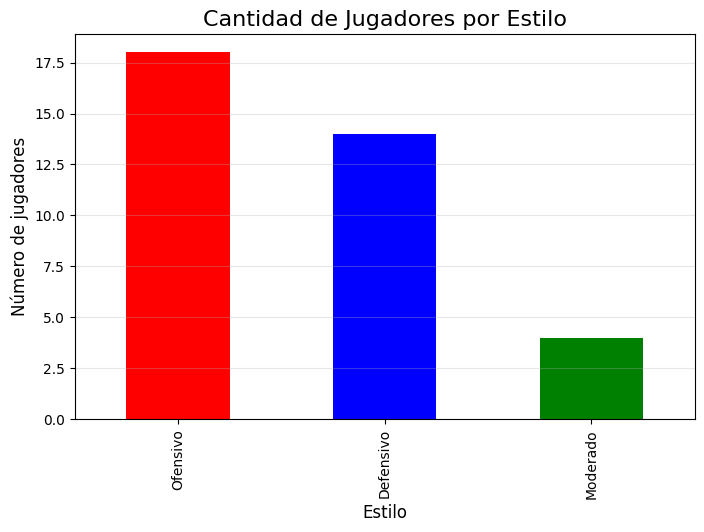

In [12]:
def assign_style(row):
    off = row["pct_off"]
    deff = row["pct_def"]

    if abs(off - deff) < 0.10:
        return "Moderado"
    elif off > deff:
        return "Ofensivo"
    else:
        return "Defensivo"

df_player["style"] = df_player.apply(assign_style, axis=1)

df_match = df_match.merge(
    df_player["style"],
    left_on=["player_name"],
    right_index=True,
    how="left"
)

plt.figure(figsize=(8, 5))

df_player["style"].value_counts().plot(kind="bar", color=["red", "blue", "green"])

plt.title("Cantidad de Jugadores por Estilo", fontsize=16)
plt.xlabel("Estilo", fontsize=12)
plt.ylabel("Número de jugadores", fontsize=12)

plt.grid(axis="y", alpha=0.3)
plt.show()


In [13]:
from sklearn.metrics import silhouette_score

# Calcular Silhouette Score usando los datos escalados y los clusters asignados
sil_score = silhouette_score(X_scaled, df_match["cluster"])
print(f"📏 Silhouette Score: {sil_score:.4f}")
    

📏 Silhouette Score: 0.2745
